<a href="https://colab.research.google.com/github/KNU-Probe/2024_Probe_Spring/blob/6%EC%A1%B0/%EC%8B%9C%EA%B3%84%EC%97%B4_%ED%83%90%EC%83%89_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시계열 자료 탐색,,

In [2]:
# 기본 라이브러리 설치 및 파일 가져오기
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import pandas as pd     # 데이터 처리와 분석을 위한 라이브러리
import numpy as np
import matplotlib.pyplot as plt   # 데이터 시각화를 위한 라이브러리
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrve')

Mounted at /content/gdrve


In [4]:
#!pip install pandas openpyxl
#!pip install pandas



# 그래프 한글 폰트 설정하기 위해 다운

!apt-get update -qq
!apt-get install fonts-nanum* -qq
#위에꺼 떄문에 되네


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
Reading package lists... Done
Building dependency tree... Do

In [12]:
import csv
import pandas as pd

# CSV 파일 경로 설정
file_path = "/content/gdrve/MyDrive/Colab Notebooks/probe동아리/electric_train.csv.crdownload"

# CSV 파일을 판다스 DataFrame으로 불러오기
train_df = pd.read_csv(file_path)

train_df.drop("Unnamed: 0",axis=1, inplace=True)



In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593355 entries, 0 to 7593354
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   electric_train.num          int64  
 1   electric_train.tm           object 
 2   electric_train.hh24         int64  
 3   electric_train.n            int64  
 4   electric_train.stn          int64  
 5   electric_train.sum_qctr     int64  
 6   electric_train.sum_load     float64
 7   electric_train.n_mean_load  float64
 8   electric_train.nph_ta       float64
 9   electric_train.nph_hm       float64
 10  electric_train.nph_ws_10m   float64
 11  electric_train.nph_rn_60m   float64
 12  electric_train.nph_ta_chi   float64
 13  electric_train.weekday      int64  
 14  electric_train.week_name    int64  
 15  electric_train.elec         float64
dtypes: float64(8), int64(7), object(1)
memory usage: 926.9+ MB


In [58]:
train_df

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7593350,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74
7593351,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18
7593352,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33
7593353,20947,2022-12-31 23:00:00,23,23,671,34200,6355.88,225.461986,2.5,47.0,2.1,0.0,0.3,5,1,122.57


In [13]:
# 시계열데이터인 점을 고려하여 '일시'열(현재는 인덱스)을 날짜 데이터 형식으로 바꿔주어야 합니다
# 날짜 데이터 변환
train_df["tm"]=train_df['electric_train.tm']
train_df.index = pd.to_datetime(train_df["tm"])
train_df['electric_train.tm'] = pd.to_datetime(train_df['electric_train.tm'])

In [14]:
train_df

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec,tm
tm,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021-01-01 01:00:00
2021-01-01 02:00:00,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021-01-01 02:00:00
2021-01-01 03:00:00,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021-01-01 03:00:00
2021-01-01 04:00:00,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021-01-01 04:00:00
2021-01-01 05:00:00,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20947,2022-12-31 20:00:00,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022-12-31 20:00:00
2022-12-31 21:00:00,20947,2022-12-31 21:00:00,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022-12-31 21:00:00
2022-12-31 22:00:00,20947,2022-12-31 22:00:00,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022-12-31 22:00:00


In [7]:
train_df.isnull().sum()

electric_train.num            0
electric_train.tm             0
electric_train.hh24           0
electric_train.n              0
electric_train.stn            0
electric_train.sum_qctr       0
electric_train.sum_load       0
electric_train.n_mean_load    0
electric_train.nph_ta         0
electric_train.nph_hm         0
electric_train.nph_ws_10m     0
electric_train.nph_rn_60m     0
electric_train.nph_ta_chi     0
electric_train.weekday        0
electric_train.week_name      0
electric_train.elec           0
dtype: int64

In [ ]:
train_df.take([1624459])
train_df.iloc[1624459]

electric_train.num                          11424
electric_train.tm             2022-04-08 21:00:00
electric_train.hh24                            21
electric_train.n                               14
electric_train.stn                            923
electric_train.sum_qctr                      7030
electric_train.sum_load                    963.52
electric_train.n_mean_load              59.049083
electric_train.nph_ta                        13.9
electric_train.nph_hm                        63.8
electric_train.nph_ws_10m                     0.9
electric_train.nph_rn_60m                     0.0
electric_train.nph_ta_chi                    13.3
electric_train.weekday                          4
electric_train.week_name                        0
electric_train.elec                        116.55
Name: 1624459, dtype: object

Text(0.5, 1.0, 'Correlation Heatmap')

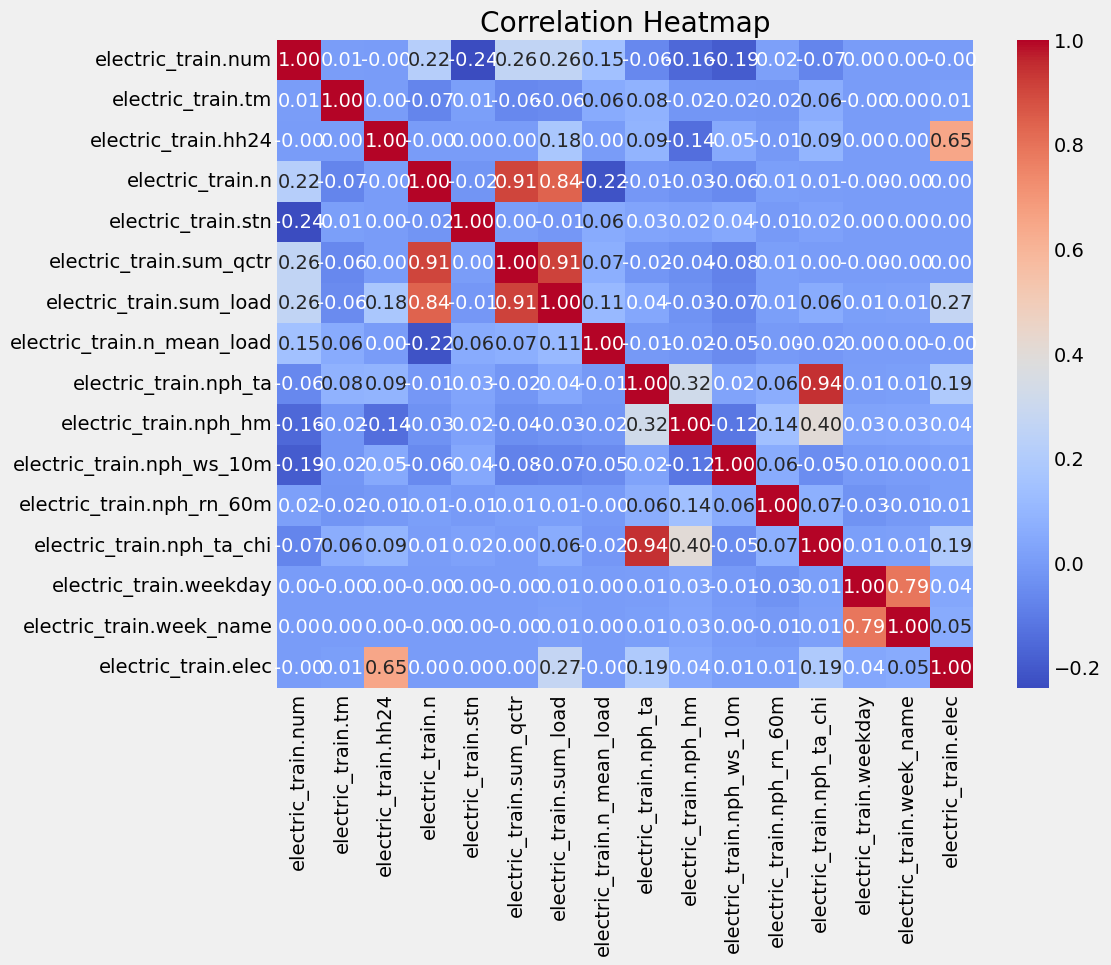

In [ ]:
corr_matrix = train_df.corr()  # 상관계수 계산
plt.figure(figsize=(10, 8))  # 도화지 만들고
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # heatmap 그리기
# (annot는 주석, cmap은 히트맵의 색깔, fmt는 소수점 몇번째 자리까지 표시)
plt.title('Correlation Heatmap')

# 좋은정보는 없어보임

#전력기상지수가 높을수록 시간이 높아진다



## 종속 변수를 하나로 정하기 위해 실시

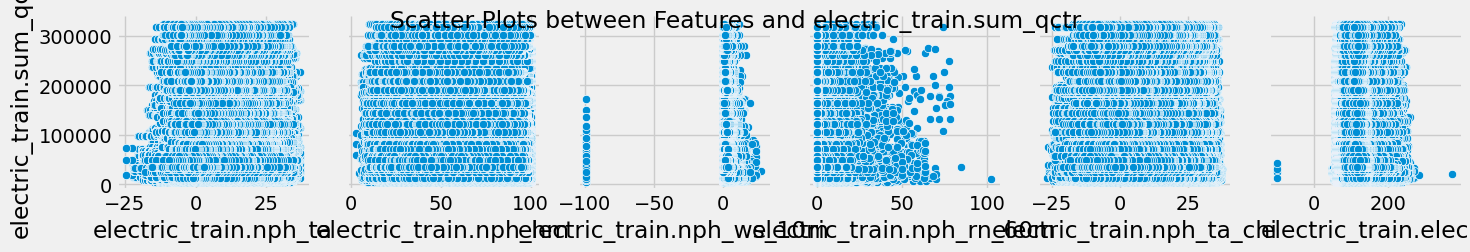

<Figure size 1000x800 with 0 Axes>

In [ ]:
# 설명변수와 예측변수 간의 산점도 행렬
sns.pairplot(train_df, x_vars=["electric_train.nph_ta",	"electric_train.nph_hm",	"electric_train.nph_ws_10m",	"electric_train.nph_rn_60m","electric_train.nph_ta_chi",	"electric_train.elec"], y_vars=["electric_train.sum_qctr"])
plt.suptitle('Scatter Plots between Features and electric_train.sum_qctr')
plt.figure(figsize=(10, 8))
plt.show()

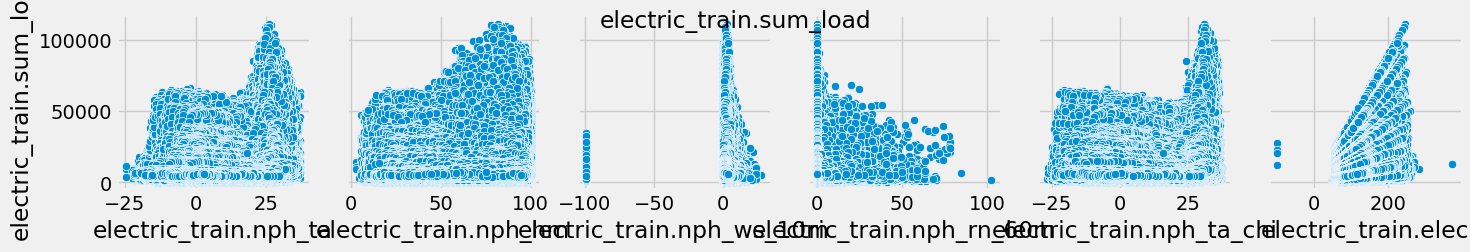

<Figure size 1000x800 with 0 Axes>

In [ ]:
# 설명변수와 예측변수 간의 산점도 행렬
sns.pairplot(train_df, x_vars=["electric_train.nph_ta",	"electric_train.nph_hm",	"electric_train.nph_ws_10m",	"electric_train.nph_rn_60m","electric_train.nph_ta_chi",	"electric_train.elec"], y_vars=["electric_train.sum_load"])
plt.suptitle('electric_train.sum_load')
plt.figure(figsize=(10, 8))
plt.show()

#체감온도 높을수록 전력수요 높은게 많고, 상대습도 높을수록 평균풍속이 0일때 높은게 많고, 평균풍속 줄어들면 줄어듬,체감온도는 비숫하다가 25도 이상이 되면 급작스럽게 높은 데이터가 늘어남


--> 문제 : 세대수가 많을 수록 전력합계가 많아지는 것을 어떻게 처리해야함....


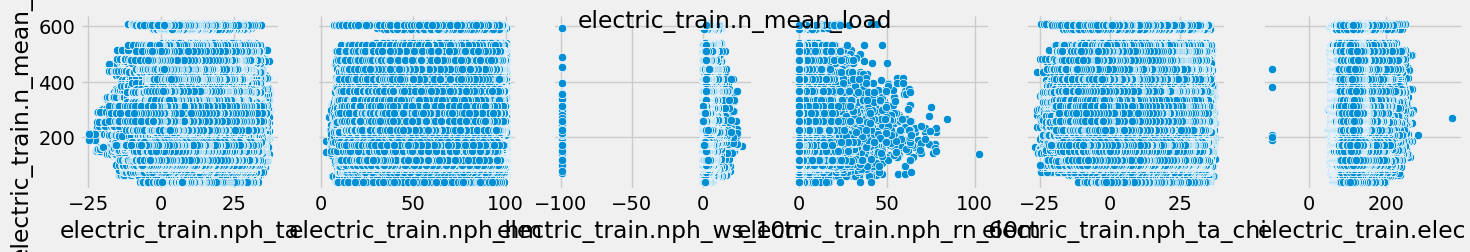

In [ ]:
# 설명변수와 예측변수 간의 산점도 행렬
sns.pairplot(train_df, x_vars=["electric_train.nph_ta",	"electric_train.nph_hm",	"electric_train.nph_ws_10m",	"electric_train.nph_rn_60m","electric_train.nph_ta_chi",	"electric_train.elec"], y_vars=["electric_train.n_mean_load"])
plt.suptitle('electric_train.n_mean_load')
plt.figure(figsize=(10, 8))
plt.show()

In [42]:
!ls /usr/share/fonts/truetype

humor-sans  liberation	nanum


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


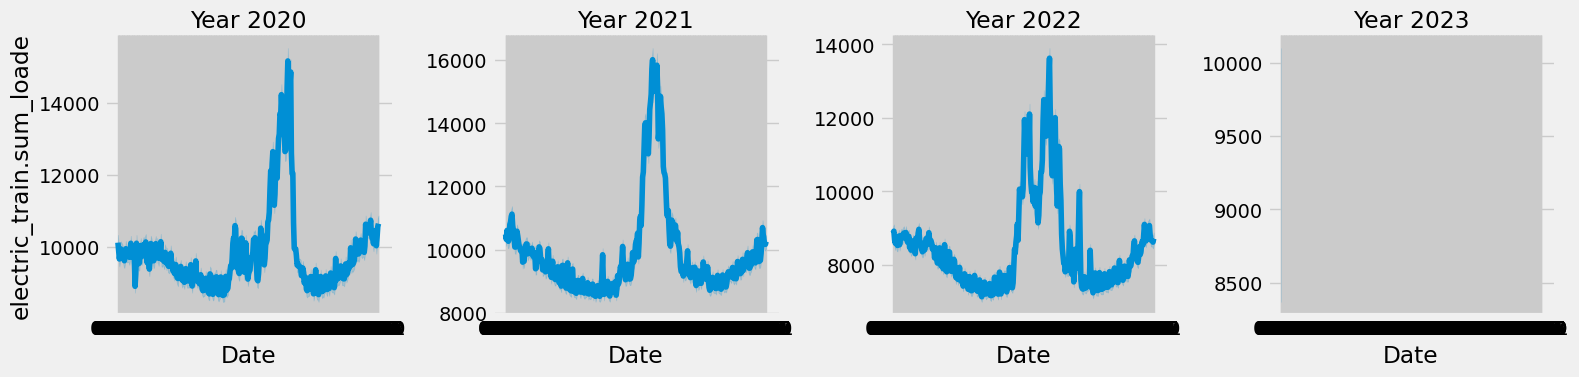

In [15]:
# 한글 폰트 설정
# '년도' 정보를 추출하여 새로운 변수 생성
plt.rc('font', family='humor-sans')
train_df['년도'] = train_df['electric_train.tm'].dt.year

# '월일' 변수 생성
train_df['월일'] = train_df['electric_train.tm'].dt.strftime('%m-%d')

# 년도별로 따로 그래프를 출력
g = sns.FacetGrid(train_df, col='년도', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, '월일', 'electric_train.sum_load', sort=False)  # sort=False로 설정하여 월-일 순서를 유지
g.set_axis_labels('Date', 'electric_train.sum_loade')
g.set_titles('Year {col_name}')
plt.show()


#7,8월에 전력소모량 커진다

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


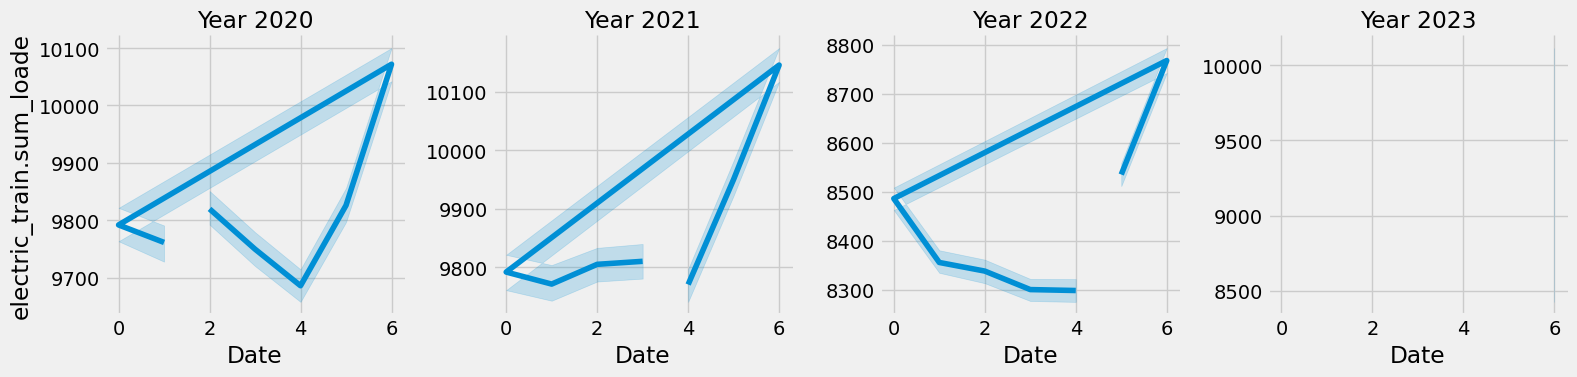

In [ ]:
#주별로 따로 그래프를 출력
g = sns.FacetGrid(train_df, col='년도', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'electric_train.weekday', 'electric_train.sum_load', sort=False)  # sort=False로 설정하여 월-일 순서를 유지
g.set_axis_labels('Date', 'electric_train.sum_loade')
g.set_titles('Year {col_name}')
plt.show()

#시계열 데이터를 사용하기 위해 주기성이 보이는 'electric_train.sum_loade'를 y로 설정함
#& x와 뚜렷한 관계가 보이는 electric_train.sum_load'를 y로 설정

In [18]:
train_df = train_df.drop(columns=['년도', '월일'])
train_df.info()

KeyError: "['년도', '월일'] not found in axis"

#Y의 분포 확인

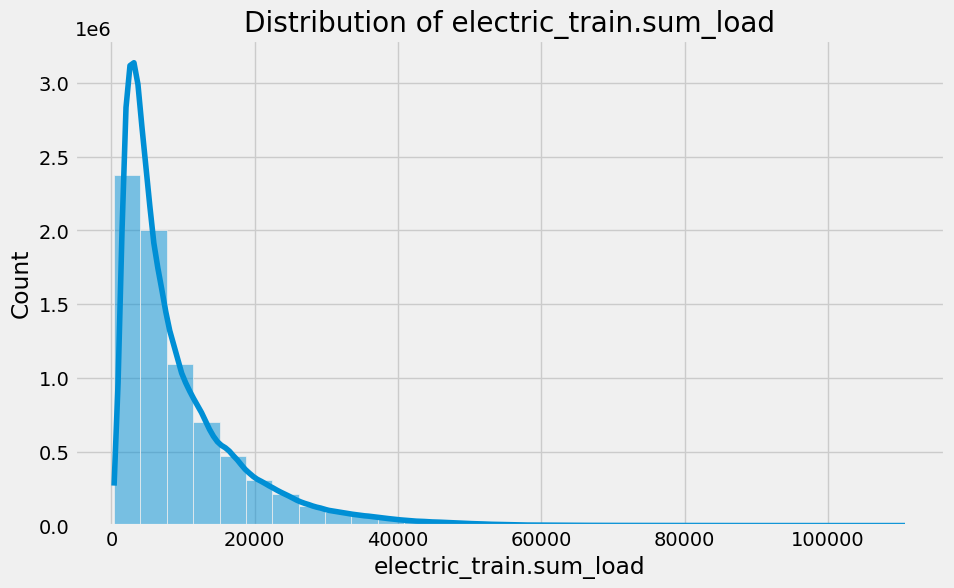

In [13]:
#Y의 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(train_df[ 'electric_train.sum_load'], bins=30, kde=True)
plt.title('Distribution of electric_train.sum_load')
plt.show()

#이 데이터에서는 로그 변환 필요해 보인다!


In [20]:
# 파생변수 생성 (날짜)

train_df['electric_train.tm'] = train_df['electric_train.tm'].astype(str)

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2})'

train_df[['연', '월', '일']] = train_df['electric_train.tm'].str.extract(time_pattern)
train_df[['연', '월', '일']] = train_df[['연', '월', '일']].apply(pd.to_numeric) # 추출된 문자열을 수치화해줍니다
train_df = train_df.drop(columns=['electric_train.tm']) # 정보 추출이 완료된 '일시' 컬럼은 제거합니다

In [21]:
train_df

,electric_train.num,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec,tm,연,월,일
tm,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021-01-01 01:00:00,2021,1,1
2021-01-01 02:00:00,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021-01-01 02:00:00,2021,1,1
2021-01-01 03:00:00,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021-01-01 03:00:00,2021,1,1
2021-01-01 04:00:00,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021-01-01 04:00:00,2021,1,1
2021-01-01 05:00:00,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021-01-01 05:00:00,2021,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022-12-31 20:00:00,2022,12,31
2022-12-31 21:00:00,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022-12-31 21:00:00,2022,12,31
2022-12-31 22:00:00,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022-12-31 22:00:00,2022,12,31


In [22]:
# 월 기준으로 electric_train.sum_load 나누기
monthly = train_df[['월','electric_train.sum_load']].groupby('월').mean()
monthly.columns = ['monthly']

In [23]:
monthly

,monthly
월,
1,9604.757570
2,9415.975578
3,8937.913558
4,8503.781871
5,8367.627626
6,9065.038431
7,11228.748711
8,11825.426966
9,8961.102388


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


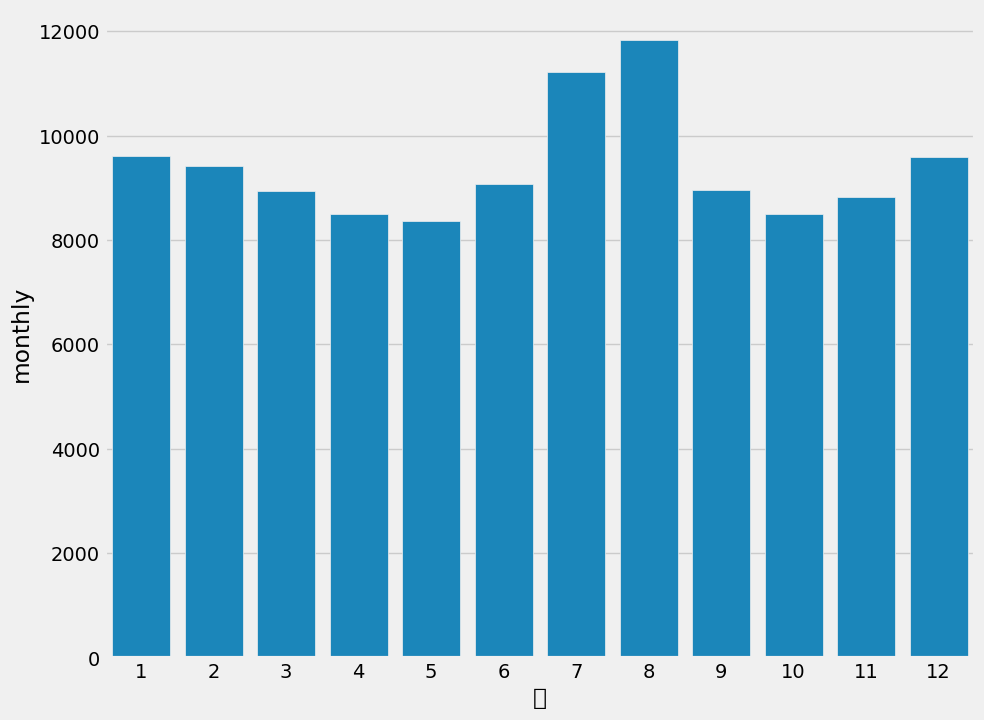

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x=monthly.index, y='monthly', data=monthly)

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.show()

7,8월에 전력소모량 많다 온도가 더우면 에어컨때문에 전력사용량 높아진다 생각

In [24]:
for i in monthly.index:
    df = train_df[train_df['월'] == i]
    globals()[f"month_{i}"] = df

In [ ]:
month_7

#7월 그래프

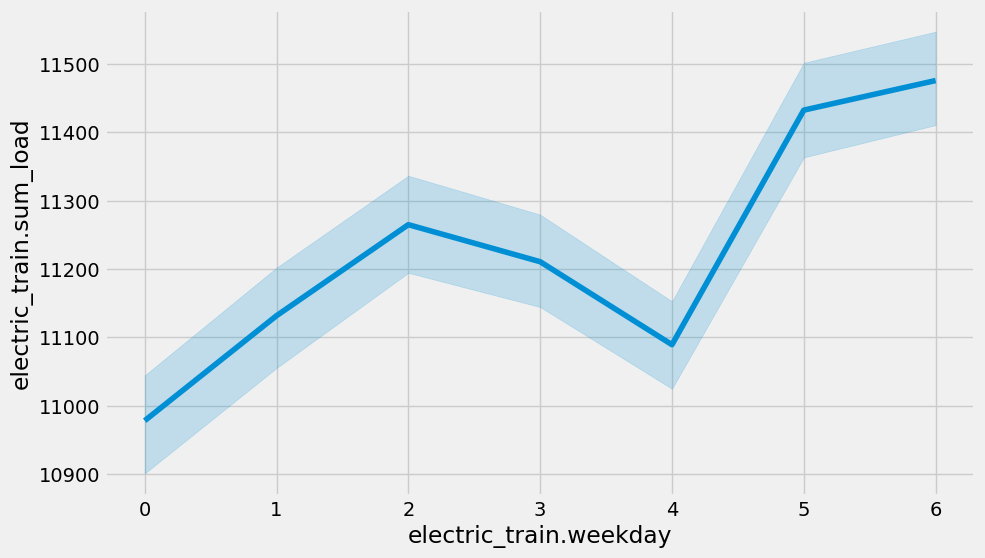

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_7["electric_train.weekday"], y=month_7["electric_train.sum_load"])
plt.show()

In [ ]:
#의미 x

<Axes: xlabel='electric_train.week_name', ylabel='electric_train.sum_load'>

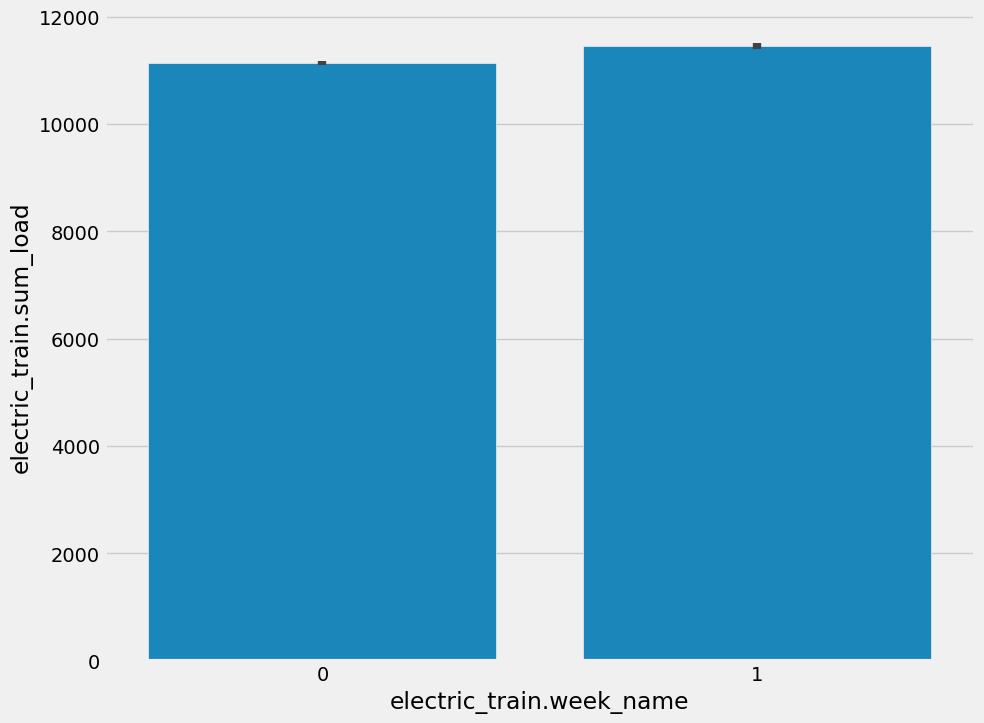

In [35]:
plt.figure(figsize=(10, 8))
sns.barplot(x=month_7["electric_train.week_name"],y="electric_train.sum_load", data=month_7)

-> 주중 5일을 더한 양과 주말의 전력사용량 차이가 비슷하다 주말에 매우 많은 전력 사용 --> 집에 있는 시간이 많아서 그런것같다

In [36]:
def categorize_day(day):
    if day <= 10:
        return '초반'
    elif day <= 20:
        return '중반'
    else:
        return '후반'

for i in monthly.index:
    df = globals()[f"month_{i}"]
    df['day'] = df['일'].apply(lambda x: categorize_day(x))
    globals()[f"month_{i}"] = df

<ipython-input-36-55ff277a0397>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['일'].apply(lambda x: categorize_day(x))
<ipython-input-36-55ff277a0397>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['일'].apply(lambda x: categorize_day(x))
<ipython-input-36-55ff277a0397>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [37]:
for i in monthly.index:
    df = globals()[f"month_{i}"]
    may = df[['day','electric_train.sum_load']].groupby('day').mean()
    may.columns = ['may']
    globals()[f"day_{i}"] = may

In [38]:
day_3

,may
day,
중반,8938.797143
초반,9132.924949
후반,8759.827216


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


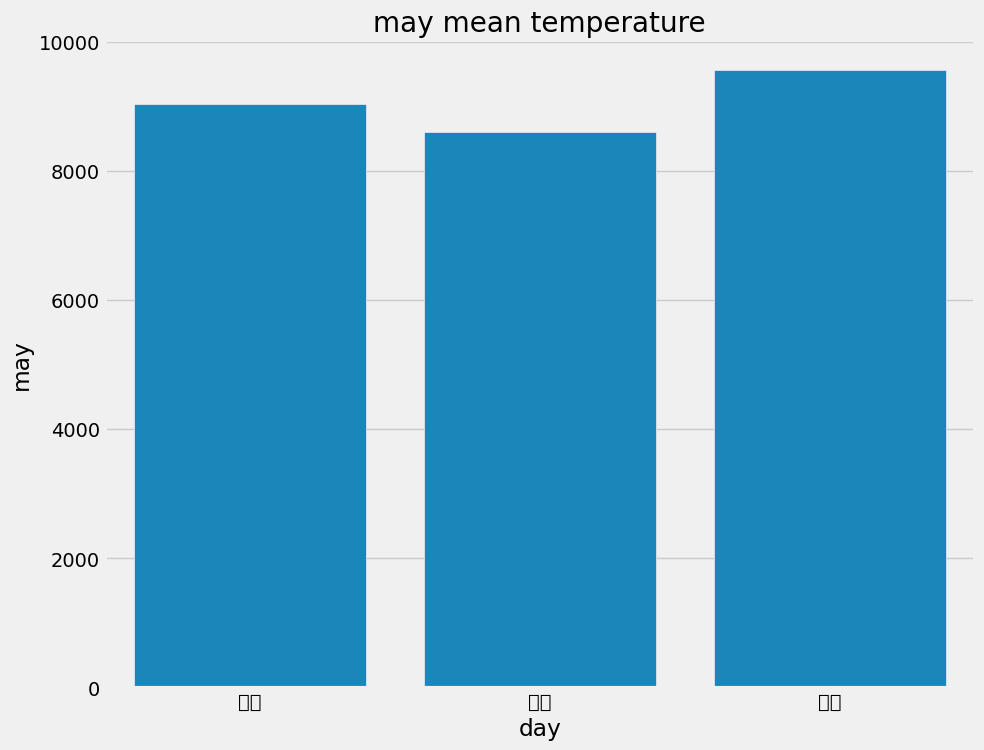

In [39]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_1.index, y='may', data=day_6)
plt.title('may mean temperature')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


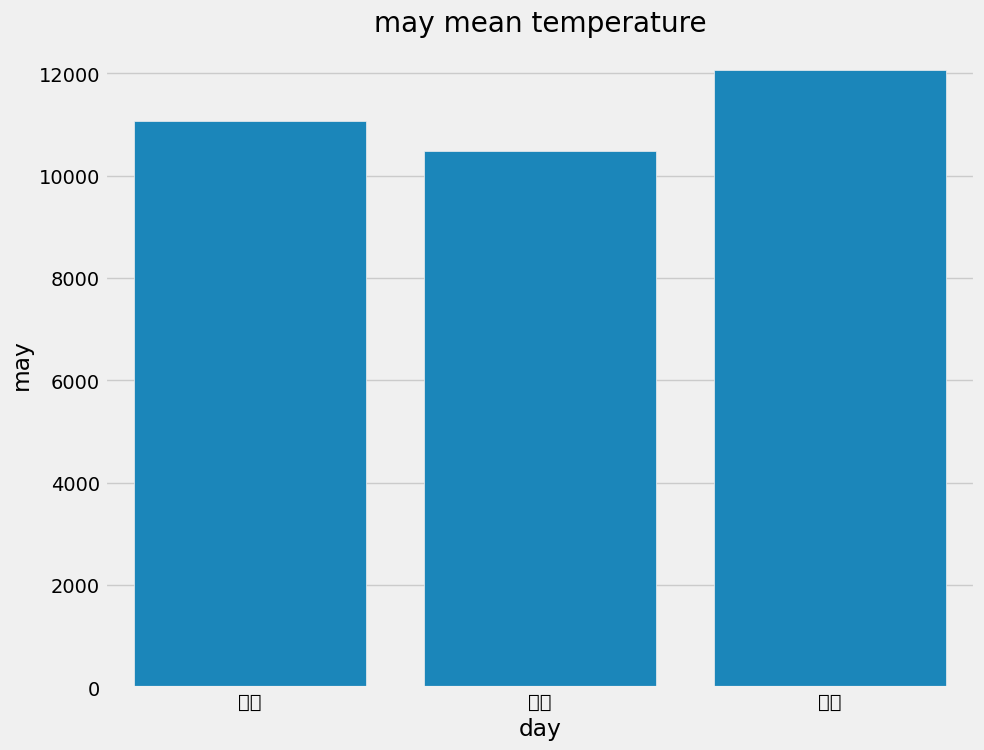

In [40]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_2.index, y='may', data=day_7)
plt.title('may mean temperature')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


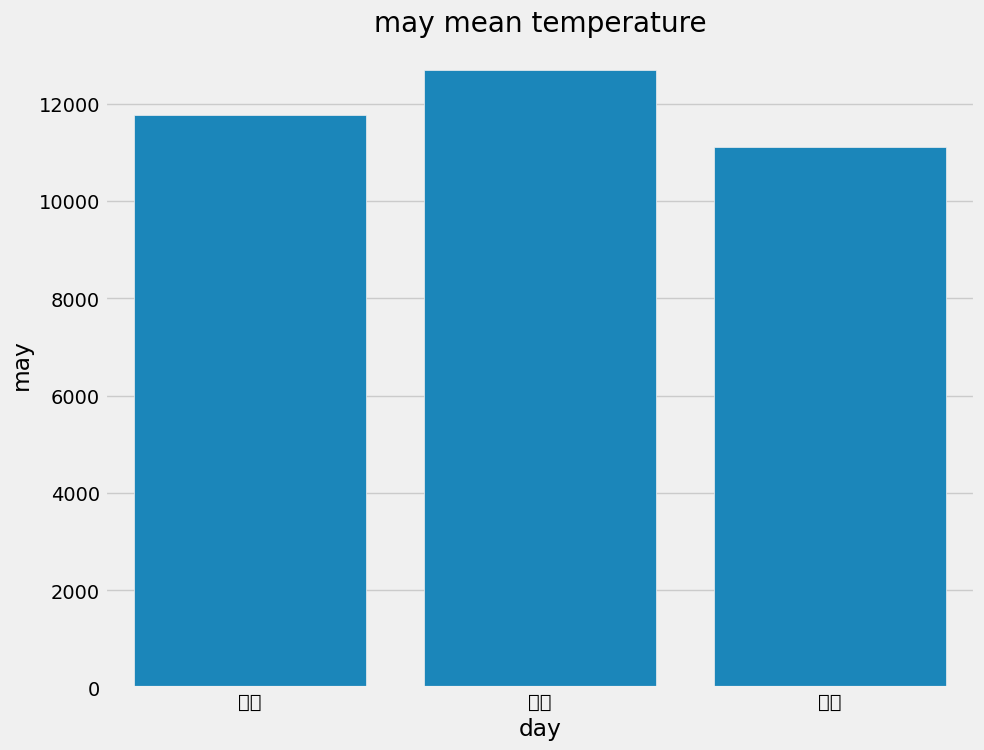

In [41]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_3.index, y='may', data=day_8)
plt.title('may mean temperature')
plt.show()

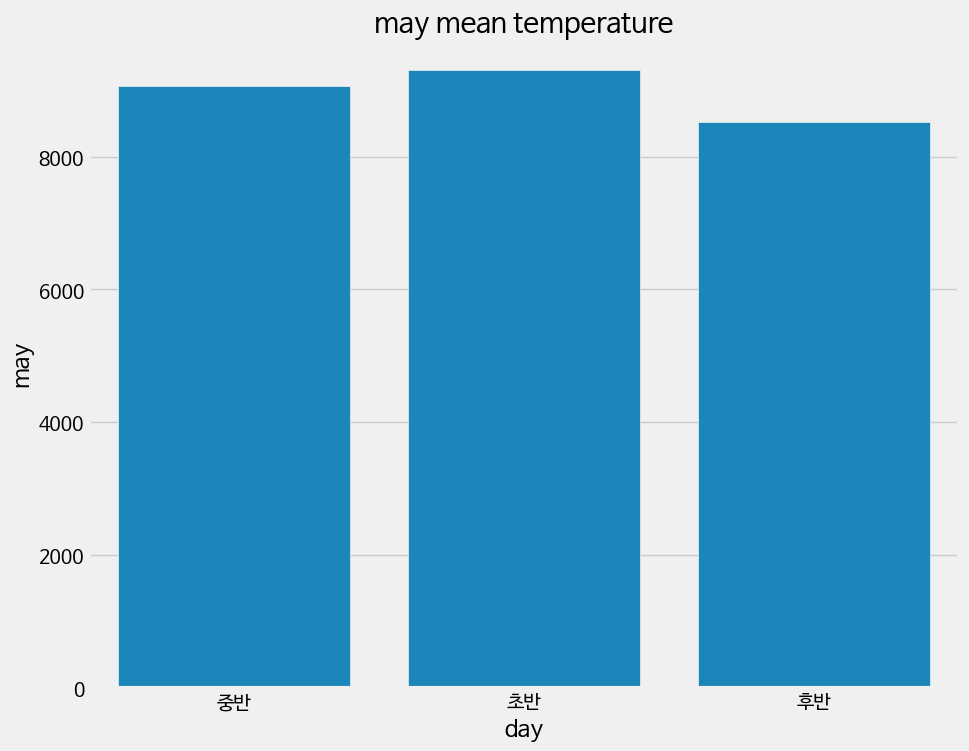

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_9.index, y='may', data=day_9)
plt.title('may mean temperature')
plt.show()

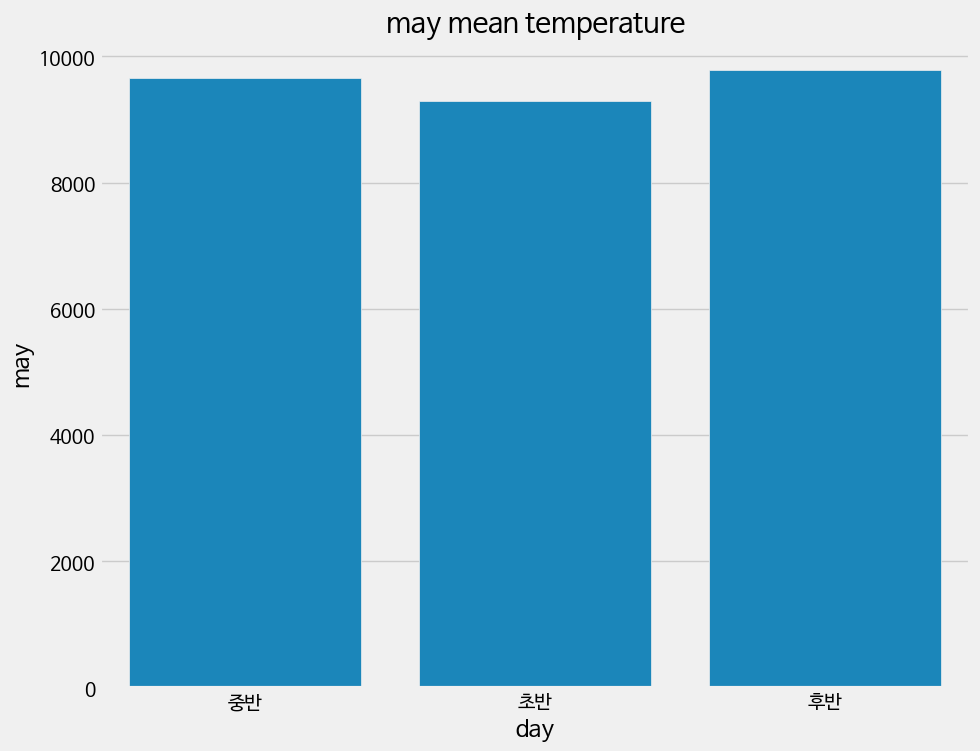

In [41]:
plt.figure(figsize=(10, 8))
sns.barplot(x=day_12.index, y='may', data=day_12)
plt.title('may mean temperature')
plt.show()

--> 잘 모르겠다

In [15]:
# 연 기준으로 평균기온 나누기
year = train_df[['연','electric_train.sum_load']].groupby('연').mean()
year.columns = ['year']

In [16]:
year

,year
연,
2020,9815.140987
2021,9863.120850
2022,8440.421304
2023,9241.671461


In [ ]:
year.index.freq = 'Y'

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=year.index, y='year', data=year)
plt.title('may mean temperature')
plt.show()

# 22년도에 사용한 전력 합계 뚝 떨어졌네? 왜지?(코로나 끝나서 사람들이 나가 놀았ㄱ때문인가?)

In [18]:
# 초/중/후반 파생변수 생성
train_df['slice'] = train_df['일'].apply(lambda x: categorize_day(x))
train_df

,electric_train.num,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec,연,월,일,slice
electric_train.tm,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,2021,1,1,초반
2021-01-01 02:00:00,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,2021,1,1,초반
2021-01-01 03:00:00,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,2021,1,1,초반
2021-01-01 04:00:00,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,2021,1,1,초반
2021-01-01 05:00:00,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,2021,1,1,초반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,0.0,-0.4,5,1,130.74,2022,12,31,후반
2022-12-31 21:00:00,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,0.0,-0.5,5,1,131.18,2022,12,31,후반
2022-12-31 22:00:00,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,0.0,0.2,5,1,129.33,2022,12,31,후반


In [19]:
one=pd.get_dummies(train_df['slice'],dtype=int)
train_df = train_df.drop(columns=['slice'])
train_df=pd.concat([train_df,one],axis=1)
train_df

,electric_train.num,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,...,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec,연,월,일,중반,초반,후반
electric_train.tm,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,-1.0,4,0,99.56,2021,1,1,0,1,0
2021-01-01 02:00:00,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,-0.6,4,0,91.78,2021,1,1,0,1,0
2021-01-01 03:00:00,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,-1.3,4,0,79.17,2021,1,1,0,1,0
2021-01-01 04:00:00,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,-0.2,4,0,73.34,2021,1,1,0,1,0
2021-01-01 05:00:00,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,-0.8,4,0,69.73,2021,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,-0.4,5,1,130.74,2022,12,31,0,0,1
2022-12-31 21:00:00,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,-0.5,5,1,131.18,2022,12,31,0,0,1
2022-12-31 22:00:00,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,0.2,5,1,129.33,2022,12,31,0,0,1


#이 아래것들은 왜 하는건지 궁금합니다

In [20]:
## 주기성 고려
# 날짜
train_df['sin_date'] = -np.sin(2 * np.pi * (train_df['월']+train_df['일']/31)/12)
train_df['cos_date'] = -np.sin(2 * np.pi * (train_df['월']+train_df['일']/31)/12)
# 월
train_df['sin_month'] = -np.sin(2 * np.pi * train_df['월']/12.0)
train_df['cos_month'] = -np.cos(2 * np.pi * train_df['월']/12.0)

In [21]:
#계변수 추가

train_df['season'] = '-'
train_df.loc[(train_df['월'] == 3) | (train_df['월'] == 4) | (train_df['월'] == 5), 'season'] = 0
train_df.loc[(train_df['월'] == 6) | (train_df['월'] == 7) | (train_df['월'] == 8), 'season'] = 1
train_df.loc[(train_df['월'] == 9) | (train_df['월'] == 10) | (train_df['월'] == 11), 'season'] = 2
train_df.loc[(train_df['월'] == 12) | (train_df['월'] == 1) | (train_df['월'] == 2), 'season'] = 3
train_df.loc[(train_df['season'] == '-'), 'season'] = 4

In [22]:
train_df['season'] = train_df['season'].astype(int)

In [23]:
train_df

,electric_train.num,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,...,월,일,중반,초반,후반,sin_date,cos_date,sin_month,cos_month,season
electric_train.tm,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,4821,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,...,1,1,0,1,0,-0.514555,-0.514555,-5.000000e-01,-0.866025,3
2021-01-01 02:00:00,4821,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,...,1,1,0,1,0,-0.514555,-0.514555,-5.000000e-01,-0.866025,3
2021-01-01 03:00:00,4821,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,...,1,1,0,1,0,-0.514555,-0.514555,-5.000000e-01,-0.866025,3
2021-01-01 04:00:00,4821,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,...,1,1,0,1,0,-0.514555,-0.514555,-5.000000e-01,-0.866025,3
2021-01-01 05:00:00,4821,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,...,1,1,0,1,0,-0.514555,-0.514555,-5.000000e-01,-0.866025,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 20:00:00,20947,20,23,671,34200,6779.84,225.461986,2.7,46.3,3.1,...,12,31,0,0,1,-0.500000,-0.500000,2.449294e-16,-1.000000,3
2022-12-31 21:00:00,20947,21,23,671,34200,6802.40,225.461986,2.6,46.8,3.1,...,12,31,0,0,1,-0.500000,-0.500000,2.449294e-16,-1.000000,3
2022-12-31 22:00:00,20947,22,23,671,34200,6706.68,225.461986,2.4,47.4,2.1,...,12,31,0,0,1,-0.500000,-0.500000,2.449294e-16,-1.000000,3


,electric_train.num,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,...,연,월,일,중반,초반,후반,sin_date,cos_date,cos_month,season
sin_month,,,,,,,,,,,,,,,,,,,,,
-1.000000e+00,644304,644304,644304,644304,644304,644304,644304,644304,644304,644304,...,644304,644304,644304,644304,644304,644304,644304,644304,644304,644304
-8.660254e-01,623519,623519,623519,623519,623519,623519,623519,623519,623519,623519,...,623519,623519,623519,623519,623519,623519,623519,623519,623519,623519
-8.660254e-01,589152,589152,589152,589152,589152,589152,589152,589152,589152,589152,...,589152,589152,589152,589152,589152,589152,589152,589152,589152,589152
-5.000000e-01,1288608,1288608,1288608,1288608,1288608,1288608,1288608,1288608,1288608,1288608,...,1288608,1288608,1288608,1288608,1288608,1288608,1288608,1288608,1288608,1288608
-1.224647e-16,623520,623520,623520,623520,623520,623520,623520,623520,623520,623520,...,623520,623520,623520,623520,623520,623520,623520,623520,623520,623520
2.449294e-16,644304,644304,644304,644304,644304,644304,644304,644304,644304,644304,...,644304,644304,644304,644304,644304,644304,644304,644304,644304,644304
5.000000e-01,644303,644303,644303,644303,644303,644303,644303,644303,644303,644303,...,644303,644303,644303,644303,644303,644303,644303,644303,644303,644303
5.000000e-01,623519,623519,623519,623519,623519,623519,623519,623519,623519,623519,...,623519,623519,623519,623519,623519,623519,623519,623519,623519,623519
8.660254e-01,644304,644304,644304,644304,644304,644304,644304,644304,644304,644304,...,644304,644304,644304,644304,644304,644304,644304,644304,644304,644304


In [24]:
train1 = train_df[["연", "sin_month"]]
train1.set_index("연", inplace=True)


,sin_month
연,
2020,2634899
2021,2619239
2022,2338950
2023,267


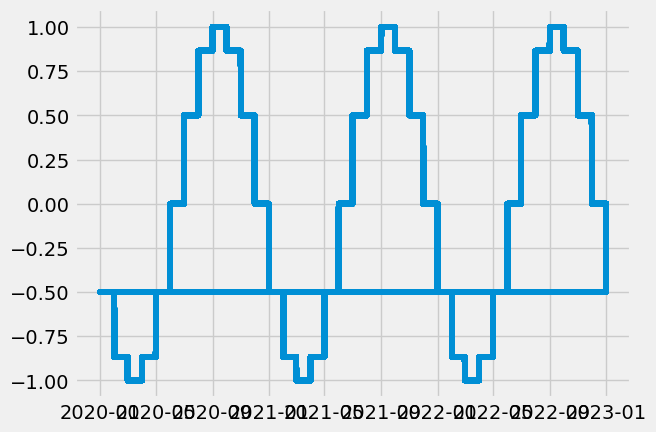

In [27]:

plt.plot(train_df['sin_month'],)


<Axes: xlabel='season', ylabel='sin_month'>

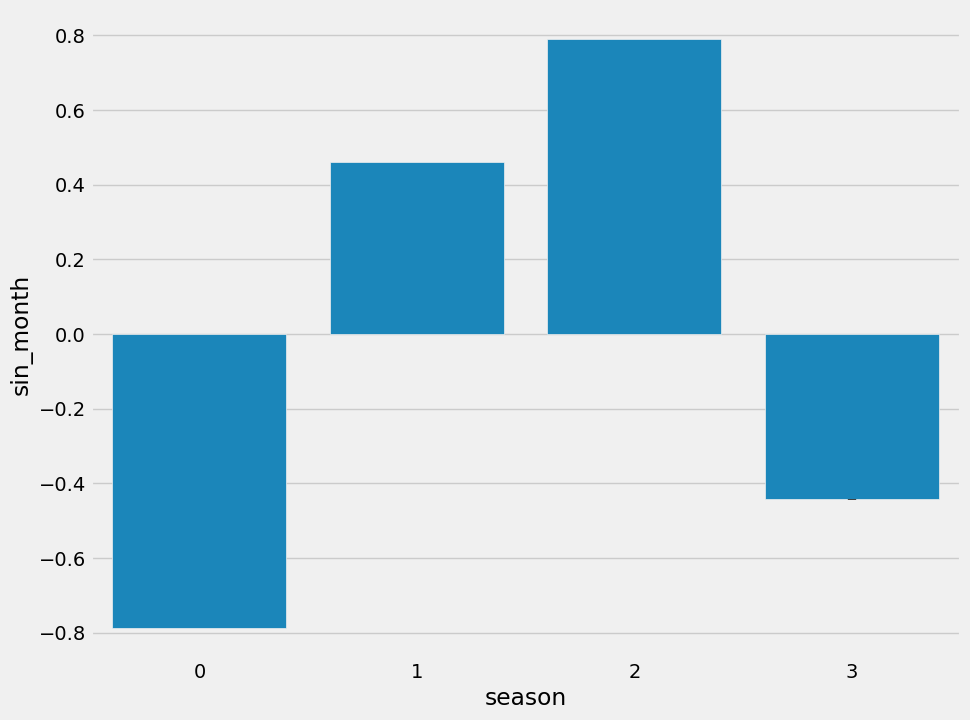

In [26]:
plt.figure(figsize=(10,8))
sns.barplot(data=train_df, x='season', y = 'sin_month')

<Axes: xlabel='월', ylabel='sin_month'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


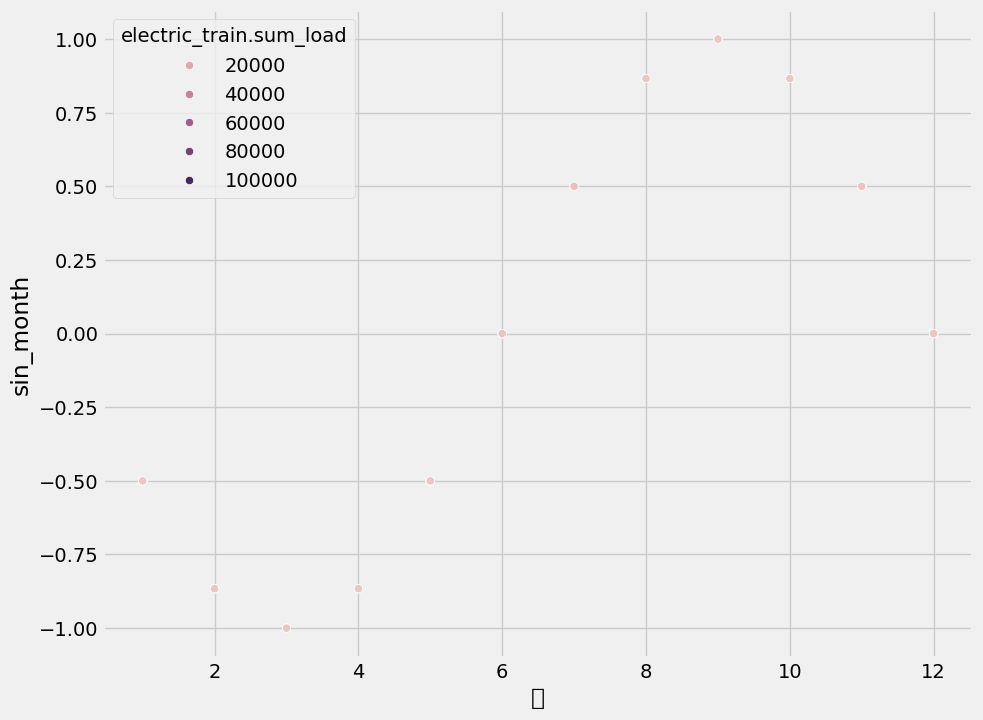

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df, x='월', y = 'sin_month', hue = 'electric_train.sum_load')

<Axes: xlabel='cos_month', ylabel='sin_month'>

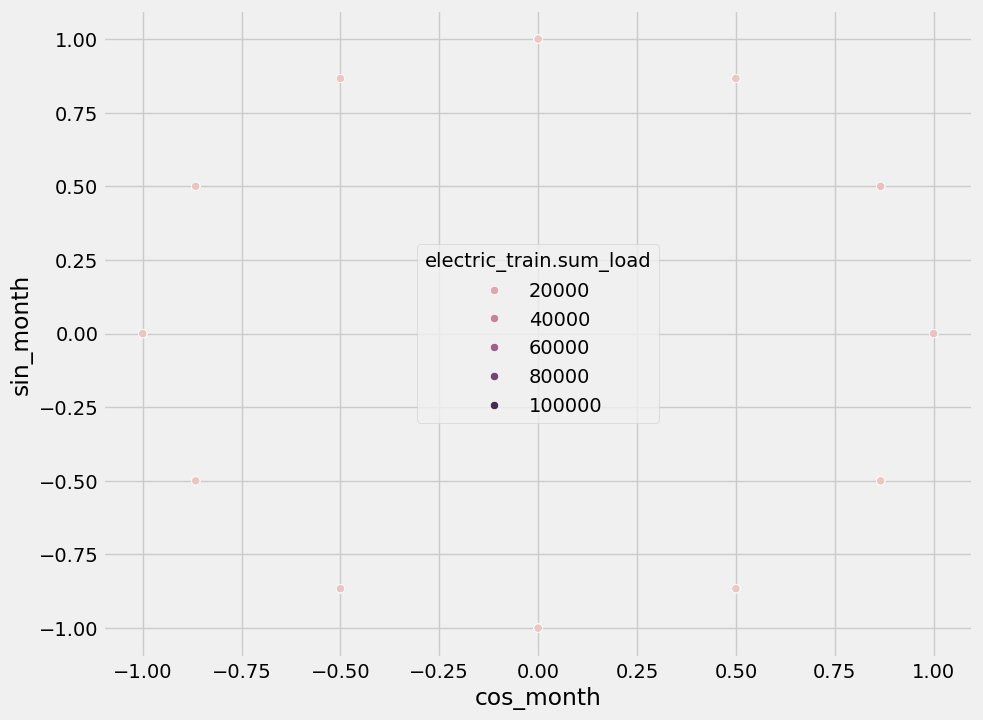

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train_df, x='cos_month', y = 'sin_month', hue = 'electric_train.sum_load')

<Axes: xlabel='electric_train.stn', ylabel='electric_train.sum_load'>

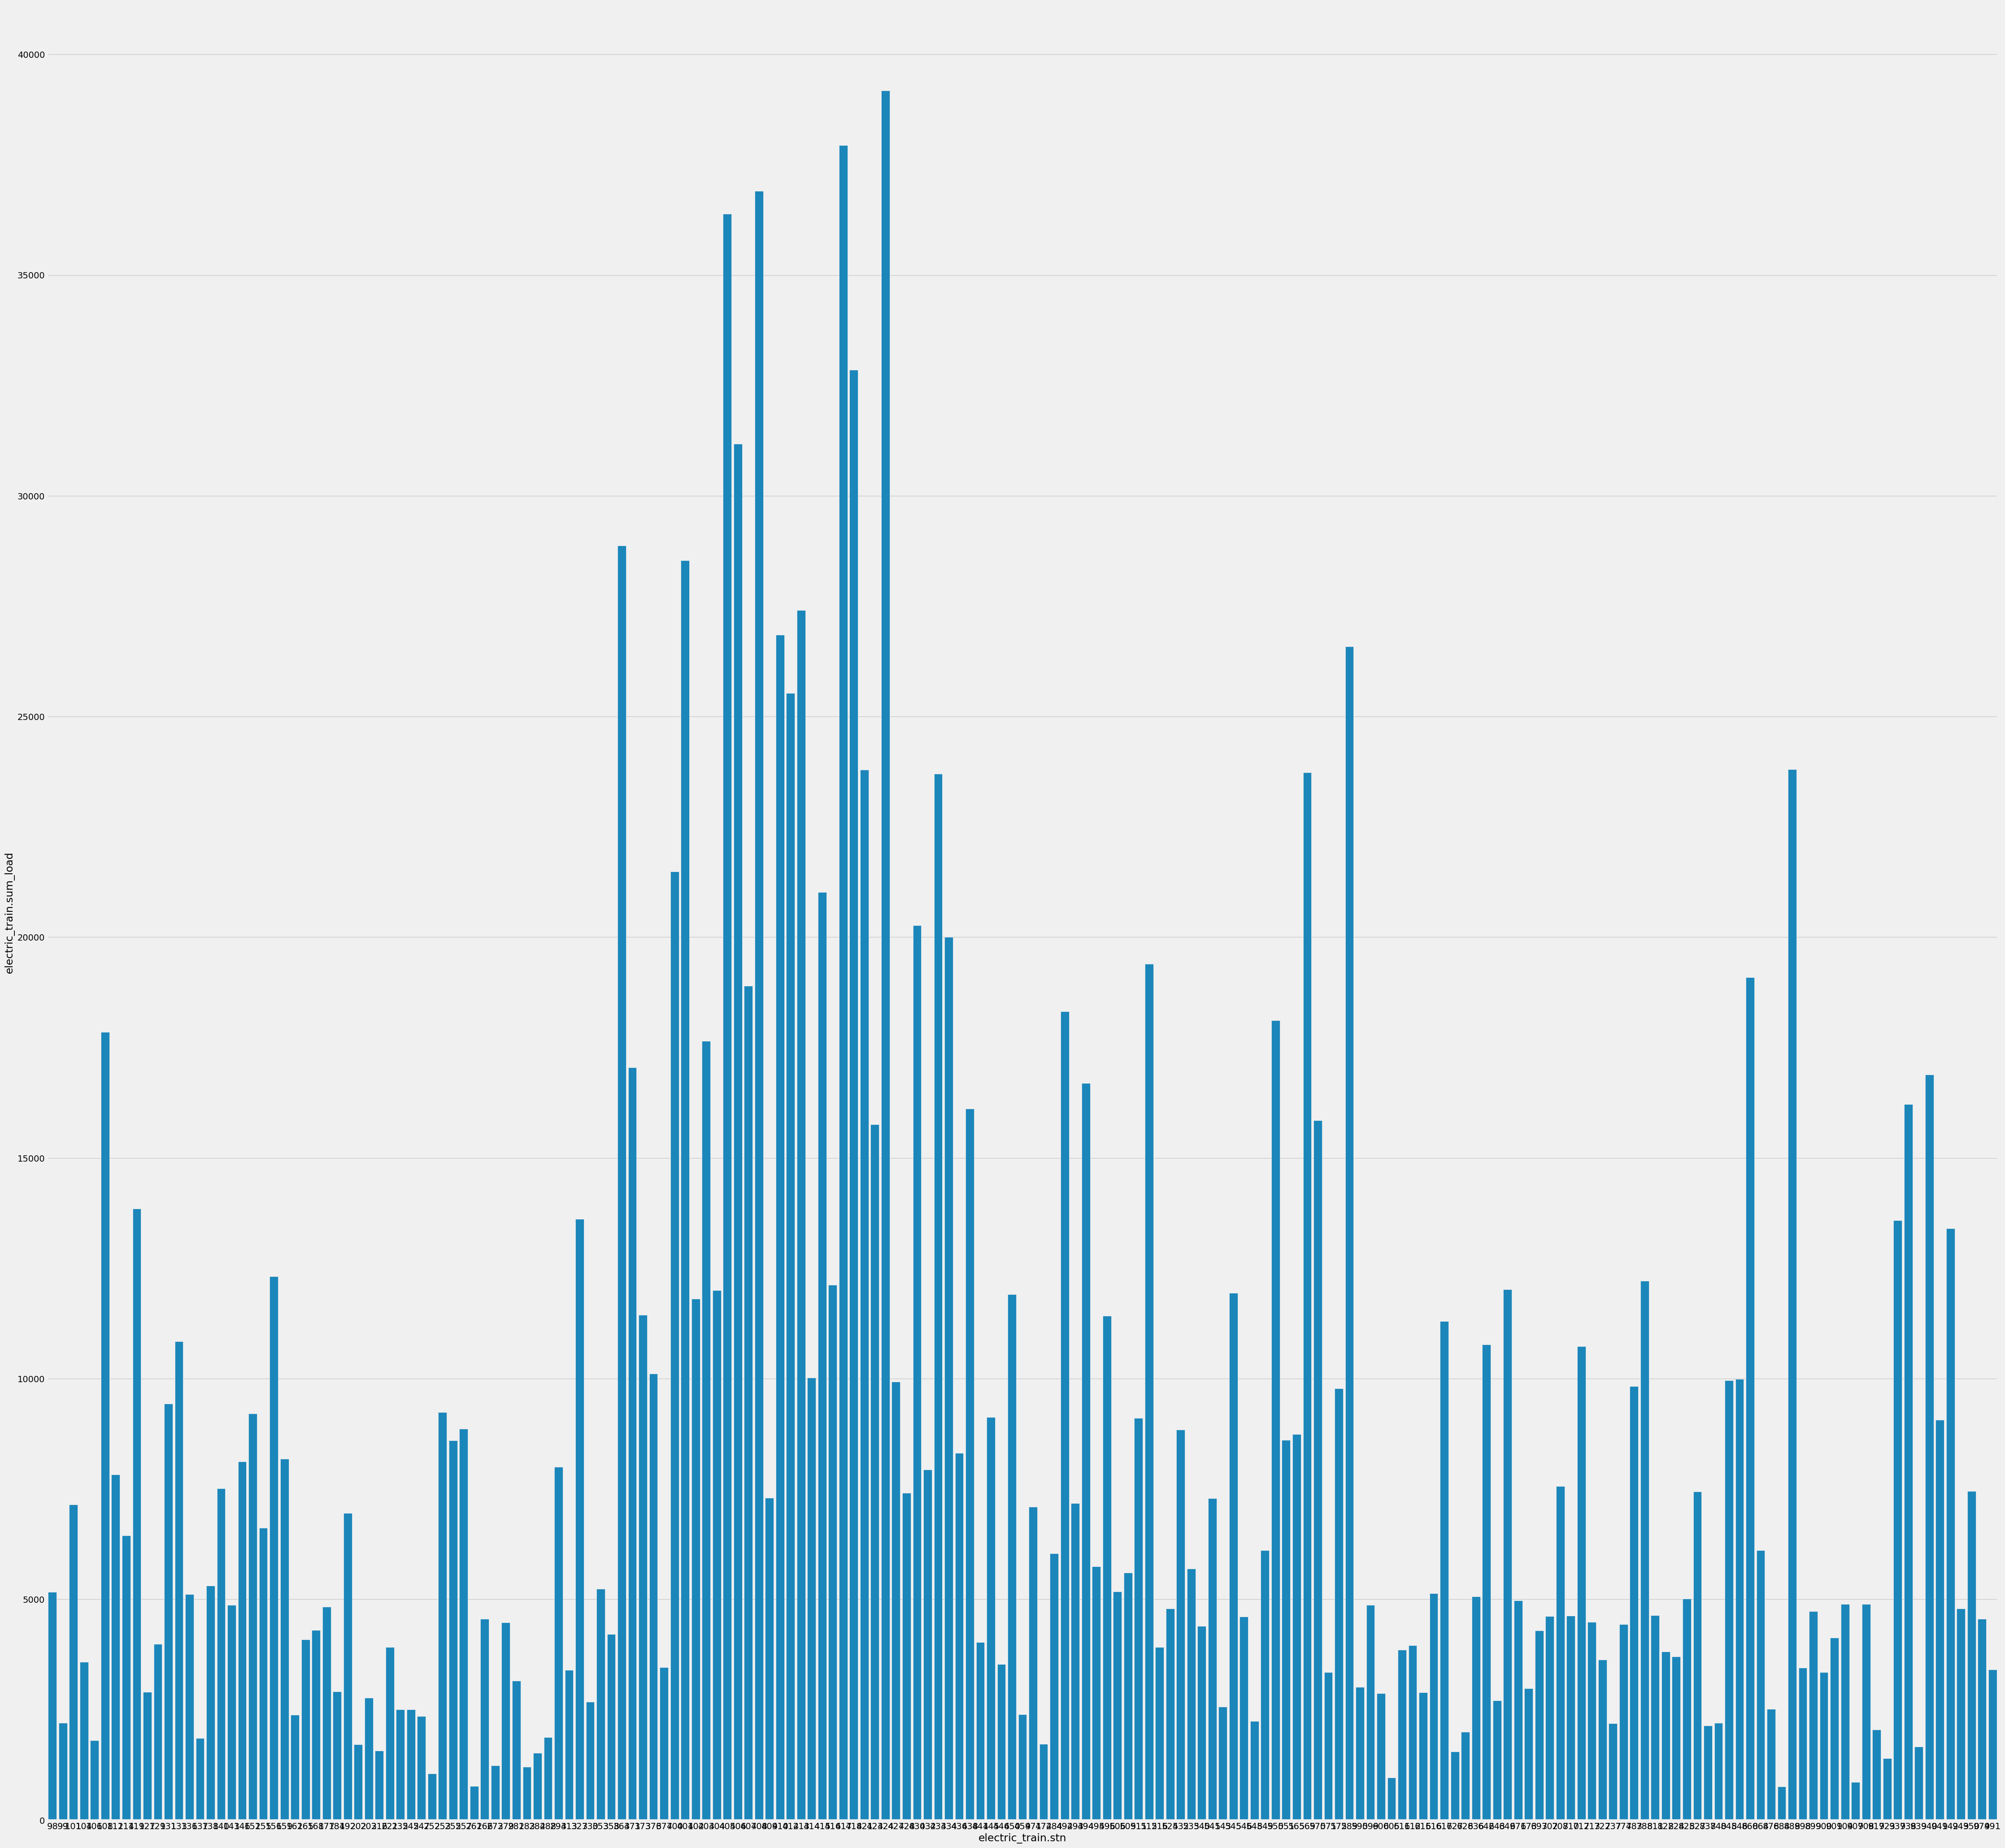

In [12]:
st=train_df.groupby("electric_train.stn").mean()

plt.figure(figsize=(50, 50))
sns.barplot(x=st.index, y="electric_train.sum_load", data=st)


#지역마다 전력수요량의 차이가 있다 이것도 고려해서 모델 만들수 있을것 같다